<a href="https://colab.research.google.com/github/NidhiChaurasia/LGMVIP-DataScience/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Market Prediction And Forecasting Using Stacked LSTM

--> We will collect the Stock Data-- NSE-TATAGLOBAL

--> Preprocess the Data- Train and Test

--> Create An Stacked LSTM model

--> Predict the test data and plot the output


In [23]:
import pandas as pan
import pandas_datareader as pdr

In [17]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL (1).csv


In [24]:
#Store the data into a data frame
dataframe = pan.read_csv('NSE-TATAGLOBAL (1).csv')
dataframe.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [28]:
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [29]:
df1 = dataframe.reset_index()['Close']

In [30]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

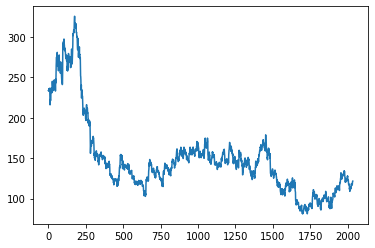

In [31]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [32]:
import numpy as np

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [35]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [36]:
training_size,test_size

(1322, 713)

In [37]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [38]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 250ms/step - loss: 0.0203 - val_loss: 0.0062
Epoch 2/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0031 - val_loss: 8.5491e-04
Epoch 3/100
20/20 [==============================] - 4s 188ms/step - loss: 0.0020 - val_loss: 9.4936e-04
Epoch 4/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
20/20 [==============================] - 4s 192ms/step - loss: 0.0016 - val_loss: 8.8274e-04
Epoch 6/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0015 - val_loss: 8.3197e-04
Epoch 7/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0014 - val_loss: 8.3029e-04
Epoch 9/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0013 - val_loss: 8.3939e-04
Epoch 10/100
20/20 [==============================] - 4s 191ms/ste

In [48]:
import tensorflow as tf

In [49]:
tf.__version__

'2.6.0'

In [50]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [51]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

160.50882905173754

In [53]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

113.79742502672987

##Prediction
Predict both the X_train and the X_test, now let’s scaler inverse transform because I want to see the root mean square performance.

Here the time step is 100, Whatever the values in train predict and test predict. I got I am just plotting it don’t forget we have to inverse the scaler transform.


-> Green indicates the Predicted Data
 
 ->Blue indicates the Complete Data


->Orange indicates the Train Data

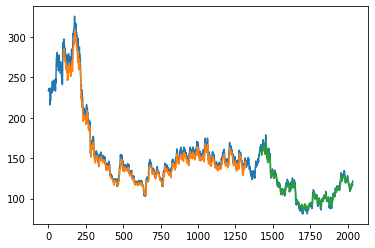

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [93]:
len(test_data) , X_test.shape

(713, (612, 100, 1))

In [56]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [62]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [63]:
import matplotlib.pyplot as plt

In [64]:
len(df1)

2035

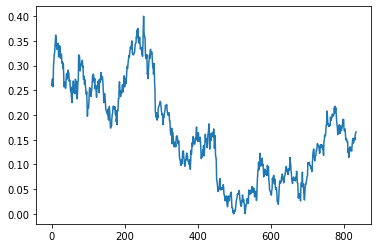

In [81]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [82]:
df3=scaler.inverse_transform(df3).tolist()

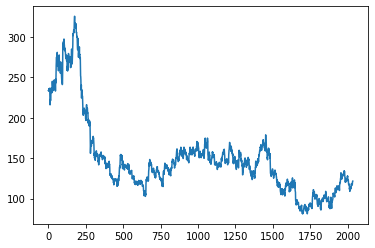

In [83]:
plt.plot(df3)